# Netflix Dataset

The Netflix Dataset has information about the TV Shows and Movies avaliable on Netflix till 2021.
This dataset is collected from Flixable which is a third-party Netflix search engine and available on Kaggle website for free. (https://www.kaggle.com/shivamb/netflix-shows)

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

data = pd.read_csv('datasets/netflix_titles.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Data cleaning

In [4]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [5]:
data.dropna(subset=['date_added'], inplace=True)

In [6]:
data.fillna({'director': 'missing', 'cast': 'missing', 'country': 'missing', 'rating': 'missing'}, inplace=True)
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
data['date_added'] = pd.to_datetime(data['date_added'])
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
def column_to_dict(column):
    result_dict = {}
    for i in range(len(data)):
        for val in data[column].iloc[i].split(','):
            val = val.strip()
            result_dict.setdefault(val, 0)
            result_dict[val] += 1
                
    result_dict = dict(sorted(result_dict.items(), key=lambda x: x[1], reverse=True))
    
    return result_dict

listed_dict = column_to_dict('listed_in')
cast_dict = column_to_dict('cast')
countries_dict = column_to_dict('country')
listed_dict

{'International Movies': 2437,
 'Dramas': 2106,
 'Comedies': 1471,
 'International TV Shows': 1198,
 'Documentaries': 786,
 'Action & Adventure': 721,
 'TV Dramas': 703,
 'Independent Movies': 673,
 'Children & Family Movies': 532,
 'Romantic Movies': 531,
 'TV Comedies': 518,
 'Thrillers': 491,
 'Crime TV Shows': 426,
 "Kids' TV": 412,
 'Docuseries': 352,
 'Romantic TV Shows': 333,
 'Stand-Up Comedy': 329,
 'Music & Musicals': 321,
 'Horror Movies': 312,
 'British TV Shows': 231,
 'Reality TV': 222,
 'Sci-Fi & Fantasy': 218,
 'Sports Movies': 196,
 'Korean TV Shows': 150,
 'TV Action & Adventure': 149,
 'Anime Series': 147,
 'Spanish-Language TV Shows': 146,
 'Classic Movies': 103,
 'TV Mysteries': 90,
 'LGBTQ Movies': 90,
 'Science & Nature TV': 85,
 'TV Sci-Fi & Fantasy': 75,
 'TV Horror': 69,
 'Teen TV Shows': 60,
 'Cult Movies': 59,
 'Faith & Spirituality': 57,
 'Anime Features': 57,
 'Movies': 56,
 'Stand-Up Comedy & Talk Shows': 52,
 'TV Thrillers': 50,
 'Classic & Cult TV': 25,

## Exploratory data analysis

### 1. What different types of show or movie are uploaded on Netflix?

In [41]:
data.type.value_counts().to_frame('values_count')

,values_count
Movie,5377
TV Show,2400


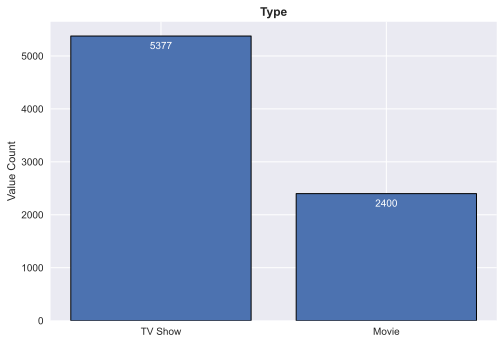

In [10]:
%config InlineBackend.figure_format = 'svg'

plt.style.use('seaborn')
fig, ax = plt.subplots()
plot = ax.bar(data.type.unique(), data.type.value_counts(), edgecolor="black", linewidth=1)
ax.set_ylabel('Value Count')
ax.bar_label(plot, padding=-15, color='white')
ax.set_title('Type', fontweight='bold');

### 2. Which director is the most popular on the Netflix?

In [11]:
data.director.value_counts()[1:15].to_frame('values_count')

,values_count
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
Jay Chapman,12
Youssef Chahine,12
Steven Spielberg,10
David Dhawan,9
Shannon Hartman,8


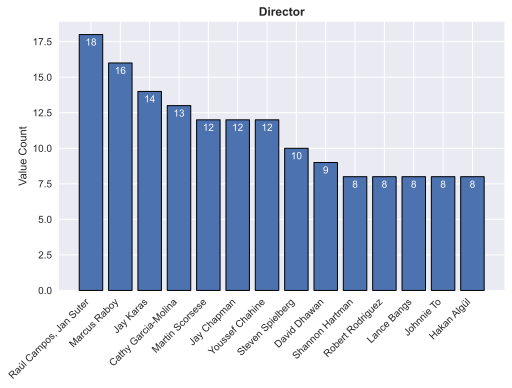

In [12]:
fig, ax = plt.subplots()
plot = ax.bar(data.director.value_counts()[1:15].index, data.director.value_counts()[1:15], edgecolor="black", linewidth=1)
ax.set_ylabel('Value Count')
fig.autofmt_xdate(rotation=45)
ax.bar_label(plot, padding=-13, color='white')
ax.set_title('Director', fontweight='bold');

### 3. Which director directed the most TV Shows / Movies?

In [13]:
grouped = data.groupby('type')
movie_directors = grouped['director'].value_counts()['Movie'][1:15].to_frame('values_count')
shows_directors = grouped['director'].value_counts()['TV Show'][1:15].to_frame('values_count');

In [14]:
movie_directors

,values_count
director,
"Raúl Campos, Jan Suter",18
Marcus Raboy,15
Jay Karas,14
Cathy Garcia-Molina,13
Jay Chapman,12
Martin Scorsese,12
Youssef Chahine,12
Steven Spielberg,10
David Dhawan,9


In [15]:
shows_directors

,values_count
director,
Alastair Fothergill,3
Iginio Straffi,2
Ken Burns,2
Rob Seidenglanz,2
Shin Won-ho,2
Stan Lathan,2
"Adrien Lagier, Ousmane Ly",1
Ah Loong,1
Ahmet Katıksız,1


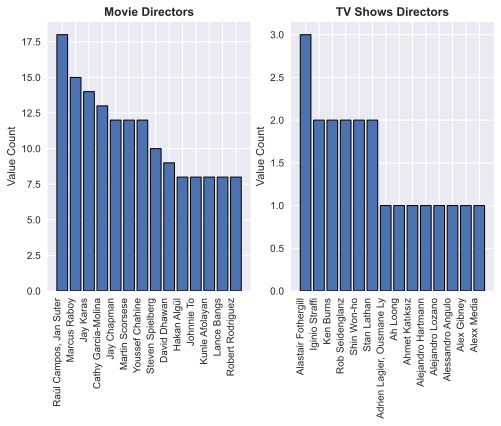

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.bar(movie_directors.index, movie_directors.values_count, edgecolor="black", linewidth=1)
ax1.set_ylabel('Value Count')
ax2.bar(shows_directors.index, shows_directors.values_count, edgecolor="black", linewidth=1)
ax2.set_ylabel('Value Count')
fig.autofmt_xdate(rotation=90)
ax1.set_title('Movie Directors', fontweight='bold')
ax2.set_title('TV Shows Directors', fontweight='bold');

The most Movies found on the Netflix directed `Raúl Campos, Jan Suter`, while `Alastair Fothergill` directed the most TV Shows that were found on the Netflix.

### 4. Which Movies & TV Shows directed most popular directors mentioned above?

In [17]:
data.loc[data.director == movie_directors.reset_index().director[0], ['title', 'director', 'type']]

,title,director,type
370,Alan Saldaña: Mi vida de pobre,"Raúl Campos, Jan Suter",Movie
568,Arango y Sanint: Ríase el show,"Raúl Campos, Jan Suter",Movie
1220,Carlos Ballarta: Furia Ñera,"Raúl Campos, Jan Suter",Movie
1443,Coco y Raulito: Carrusel de ternura,"Raúl Campos, Jan Suter",Movie
1602,Daniel Sosa: Sosafado,"Raúl Campos, Jan Suter",Movie
2148,Fernando Sanjiao: Hombre,"Raúl Campos, Jan Suter",Movie
3123,Jani Dueñas: Grandes fracasos de ayer y hoy,"Raúl Campos, Jan Suter",Movie
3805,Luciano Mellera: Infantiloide,"Raúl Campos, Jan Suter",Movie
3885,Malena Pichot: Estupidez compleja,"Raúl Campos, Jan Suter",Movie
4005,Mea Culpa,"Raúl Campos, Jan Suter",Movie


In [18]:
data.loc[data.director == shows_directors.reset_index().director[0], ['title', 'director', 'type']]

,title,director,type
2299,Frozen Planet,Alastair Fothergill,TV Show
4876,Planet Earth: The Complete Collection,Alastair Fothergill,TV Show
6148,The Blue Planet: A Natural History of the Oceans,Alastair Fothergill,TV Show


### 5. What different types of actors cast the shows most often?

In [19]:
celebrities = pd.Series(data=cast_dict)
celebrities = celebrities.to_frame('values_count')[1:15]
celebrities

,values_count
Anupam Kher,42
Shah Rukh Khan,35
Naseeruddin Shah,30
Om Puri,30
Takahiro Sakurai,29
Akshay Kumar,29
Boman Irani,27
Amitabh Bachchan,27
Paresh Rawal,27
Yuki Kaji,27


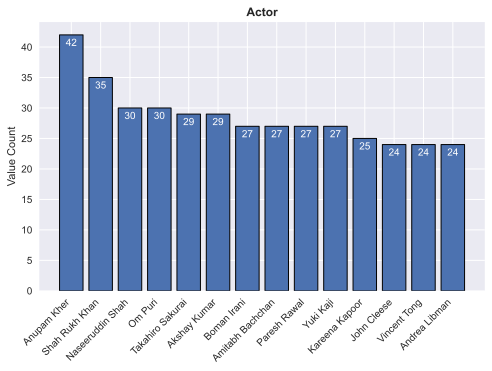

In [20]:
fig, ax = plt.subplots()
plot = ax.bar(celebrities.index, celebrities.values_count, edgecolor="black", linewidth=1)
ax.set_ylabel('Value Count')
fig.autofmt_xdate(rotation=45)
ax.bar_label(plot, padding=-13, color='white')
ax.set_title('Actor', fontweight='bold');

### 6. In which countries were the most show casted?

In [21]:
countries = pd.Series(data=countries_dict)
countries = countries.to_frame('values_count')[:15]
countries

,values_count
United States,3291
India,990
United Kingdom,722
missing,506
Canada,412
France,349
Japan,286
Spain,215
South Korea,212
Germany,199


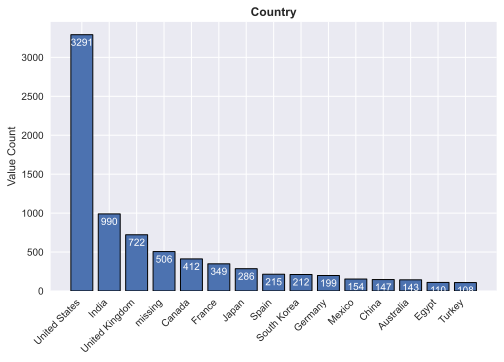

In [22]:
fig, ax = plt.subplots()
plot = ax.bar(countries.index, countries.values_count, edgecolor="black", linewidth=1)
ax.set_ylabel('Value Count')
fig.autofmt_xdate(rotation=45)
ax.bar_label(plot, padding=-13, color='white')
ax.set_title('Country', fontweight='bold');

### 7. Which show tags are the most popular on the Netflix?

In [23]:
tags = pd.Series(data=listed_dict)
tags = tags.to_frame('values_count')[:15]
tags

,values_count
International Movies,2437
Dramas,2106
Comedies,1471
International TV Shows,1198
Documentaries,786
Action & Adventure,721
TV Dramas,703
Independent Movies,673
Children & Family Movies,532
Romantic Movies,531


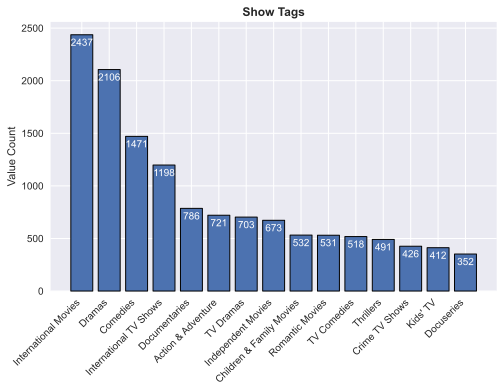

In [24]:
fig, ax = plt.subplots()
plot = ax.bar(tags.index, tags.values_count, edgecolor="black", linewidth=1)
ax.set_ylabel('Value Count')
fig.autofmt_xdate(rotation=45)
ax.bar_label(plot, padding=-13, color='white')
ax.set_title('Show Tags', fontweight='bold');

### 8. In which month or year shows are added onto the Netflix mainly?

In [25]:
import calendar
month = data.date_added.dt.month
month = month.apply(lambda x: calendar.month_abbr[x])

year = data.date_added.dt.year

In [42]:
month.value_counts().to_frame('values_count')

,values_count
Dec,833
Oct,785
Jan,757
Nov,738
Mar,669
Sep,619
Aug,618
Apr,601
Jul,600
May,543


In [43]:
year.value_counts().to_frame('values_count')

,values_count
2019,2153
2020,2009
2018,1685
2017,1225
2016,443
2021,117
2015,88
2014,25
2011,13
2013,11


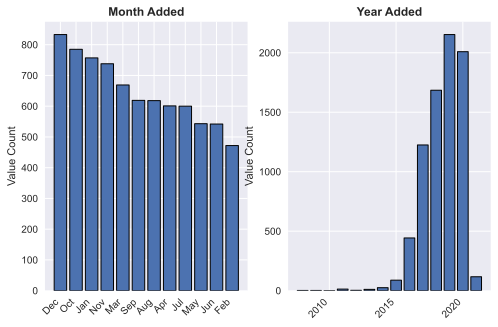

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.bar(month.value_counts().index, month.value_counts(), edgecolor="black", linewidth=1)
ax1.set_ylabel('Value Count')
ax2.bar(year.value_counts().index, year.value_counts(), edgecolor="black", linewidth=1)
ax2.set_ylabel('Value Count')
fig.autofmt_xdate(rotation=45)
ax1.set_title('Month Added', fontweight='bold');
ax2.set_title('Year Added', fontweight='bold');

### 9. In which year maximum shows were released on the Netflix?

In [29]:
data.release_year.value_counts()

2018    1120
2017    1012
2019     996
2016     881
2020     868
        ... 
1959       1
1966       1
1925       1
1964       1
1947       1
Name: release_year, Length: 73, dtype: int64

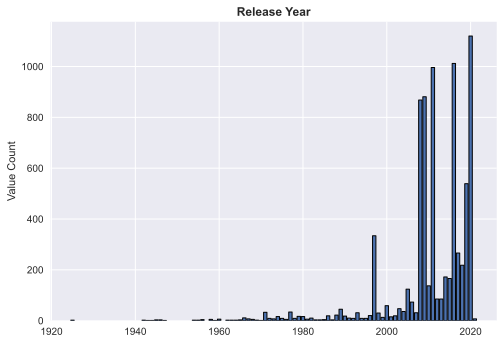

In [30]:
fig, ax = plt.subplots()
ax.bar(data.release_year.unique(), data.release_year.value_counts(), edgecolor="black", linewidth=1)
ax.set_ylabel('Value Count')
ax.set_title('Release Year', fontweight='bold');

### 10. What are the different types of rating given on the Netflix?

In [48]:
data.rating.value_counts().sort_values(ascending=False).to_frame('values_count')

,values_count
TV-MA,2861
TV-14,1928
TV-PG,804
R,665
PG-13,386
TV-Y,279
TV-Y7,270
PG,247
TV-G,194
NR,83


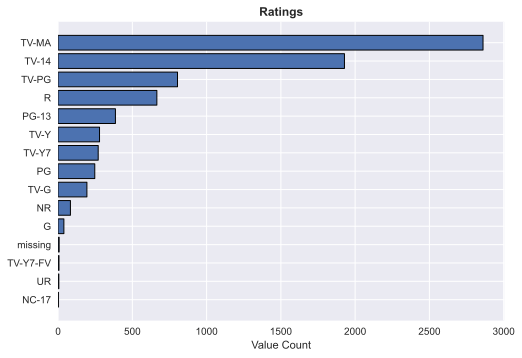

In [46]:
fig, ax = plt.subplots()
plot = ax.barh(data.rating.value_counts().sort_values().index, data.rating.value_counts().sort_values(),
         edgecolor="black", linewidth=1)
ax.set_xlabel('Value Count')
ax.set_title('Ratings', fontweight='bold');

### 11. What is the most common Netflix show duration time?

In [33]:
movie_duration = data[data.duration.str.contains('min')].duration
movie_duration = movie_duration.str.split(' ', expand=True).iloc[:, 0].to_list()
movie_duration = [int(x) for x in movie_duration]

In [49]:
show_duration = data[data.duration.str.contains('Season')].duration
show_duration.value_counts().to_frame('values_count')

,values_count
1 Season,1608
2 Seasons,378
3 Seasons,183
4 Seasons,86
5 Seasons,57
6 Seasons,30
7 Seasons,19
8 Seasons,18
9 Seasons,8
10 Seasons,5


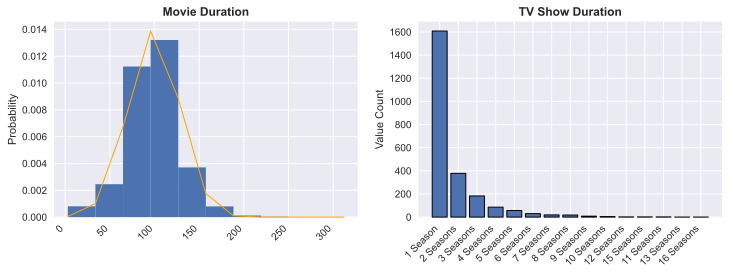

In [35]:
import numpy as np
mu = np.mean(movie_duration)
sigma = np.std(movie_duration)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
n, bins, patches = ax1.hist(movie_duration, density=True)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax1.plot(bins, y, '-', color = 'orange', linewidth=1)
ax1.set_ylabel('Probability')
ax2.bar(show_duration.value_counts().index, show_duration.value_counts(), edgecolor="black", linewidth=1)
ax2.set_ylabel('Value Count')
fig.autofmt_xdate(rotation=45)
ax1.set_title('Movie Duration', fontweight='bold');
ax2.set_title('TV Show Duration', fontweight='bold');